In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import PyGnuplot as gp

sns.set()
sns.set_style("whitegrid")



#inv_data = pd.read_excel('Inv-Allgather-MVAPICH.xlsx', sheet_name='Summary')
ns_data = pd.read_excel('NS-Allgather-MVAPICH.xlsx', sheet_name='Summary')

MessageSizes = list(ns_data['Unnamed: 0'][3:25])


print(MessageSizes)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152]


In [57]:
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=20, family='Times')
def my_plot(subplot, x, y, labels):    
    colors = ['blue', 'red', 'green', 'black', 'orange', 'teal', 'purple', 'navy']
    
    for i in range(len(labels)):
        subplot.plot(x, y[i], '-x', color=colors[i], label=labels[i] , markersize=10, linewidth=2)
    
    
    subplot.tick_params(labelsize=14)
    subplot.set_xticks(x[-4:])
    
    
    subplot.set_xlabel('Message Size (B)', fontproperties=font_prop)
    subplot.set_ylabel('Latency (us)', fontproperties=font_prop)
    
    subplot.legend(fontsize=15)
    
def compute_overheads(base, results):
    overheads=[]
    for r in results:
        overheads.append([100*(i-j)/j for i,j in zip(r, base)])
    return overheads

def plot_overheads(x, overheads, labels):
    colors = ['orange', 'red', 'green', 'blue', 'black', 'pink']
    barwidth = 0.13
    fig =plt.subplots(figsize=(20, 8))
    
    for i in range(len(overheads)):
        x_br = [j + i*barwidth for j in range(len(x))]
        plt.bar(x_br, overheads[i], width=barwidth, label=labels[i], color=colors[i])
        
    plt.xlabel('Message Size (B)', fontproperties=font_prop)
    plt.ylabel('Latency Overhead %', fontproperties=font_prop)
    
    plt.xticks([r + barwidth for r in range(len(x))], [str(s) for s in x])
    plt.tick_params(labelsize=15)
    plt.legend(fontsize=15)
    plt.show()
    

def categorize(lists, l_t):
    s_list, l_list= [], []
    for l in lists:
        s_list.append(l[:l_t])
        l_list.append(l[l_t:])
    return s_list, l_list

# Comm. vs Enc. Throughput

In [73]:
def export_troughput_data(data, MessageSizes):

    with open('throughputs_bar_data.dat', 'w') as output:
        for i in range(len(MessageSizes)):
            new_line = str(MessageSizes[i]) + ", " + str(data[0][i])  + ", " + str(data[1][i])
            output.write(new_line)
            output.write("\n")





# def bar_plot(idx, subsets, label, caption):
#     types = ['Small', 'Med', 'Large', 'Large']
#     if 'ml' in caption:
#         plotter = 'Bar_Plot_ML_'
#     else:
#         plotter = 'Bar_Plot_'
#     cmd = '''gnuplot -e "label='{}'" -e "file='{}'" {}{}.p'''.format(label+str(idx), caption+'_bar_data_'+str(idx)+'.dat',plotter, types[idx])
#     os.system(cmd)
    

In [78]:
throughputs_data = pd.read_excel('Enc-Comm-throughput.xlsx', sheet_name='Summary')

throughputs_msgs = list(throughputs_data['Unnamed: 1'][1:9])
comm_throughput = list(throughputs_data['Unnamed: 2'][1:9])
enc_throughput = list(throughputs_data['Unnamed: 3'][1:9])



#export_troughput_data([comm_throughput, enc_throughput], throughputs_msgs)
    
    
#cmd = '''gnuplot  Heatmap_Plot.p'''.format('heartmap', 'heatmap_data.dat')
os.system("gnuplot Throughput_Bar_Plot.p")



0

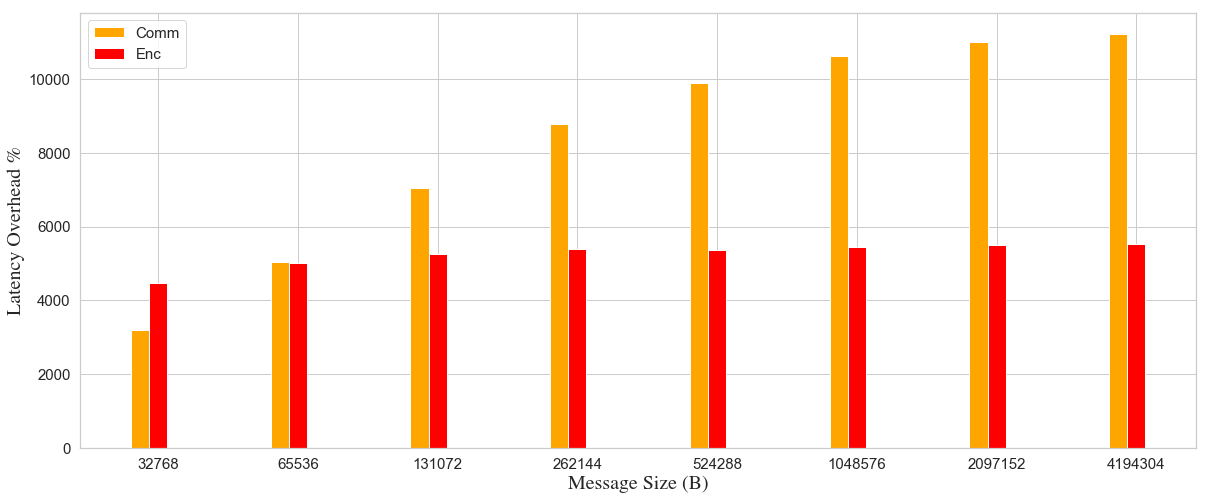

In [69]:
plot_overheads(throughputs_msgs, [comm_throughput, enc_throughput], ['Comm', 'Enc'])


# f = plt.figure(figsize=(16,6))
# h1 = f.add_subplot(111)

# my_plot(h1, throughputs_msgs, [comm_throughput, enc_throughput], ['Comm', 'Enc'])


# plt.legend(prop=font_prop)
# plt.tight_layout()
# plt.title("Throughputs", fontproperties=font_prop)

# plt.show()

# Inv - 4 Nodes - 32 ranks - Block 

## Unencrypted

In [3]:
# INV_Unenc_Default_4_32 = list(inv_data['Unnamed: 1'][3:17])
# INV_Unenc_Default_SendPlus_4_32 = list(inv_data['Unnamed: 2'][3:17])
# INV_Unenc_NB_4_32 = list(inv_data['Unnamed: 3'][3:17])
# INV_Unenc_RingNB_4_32 = list(inv_data['Unnamed: 4'][3:17])
# INV_Unenc_ML_4_32 = list(inv_data['Unnamed: 5'][3:17])
# INV_Unenc_MLRD_4_32 = list(inv_data['Unnamed: 6'][3:17])

# f = plt.figure(figsize=(16,6))
# h1 = f.add_subplot(121)
# h2 = f.add_subplot(122)

# my_plot(h1, MessageSizes[:6], [INV_Unenc_Default_4_32[:6], INV_Unenc_Default_SendPlus_4_32[:6], INV_Unenc_NB_4_32[:6], INV_Unenc_RingNB_4_32[:6], INV_Unenc_ML_4_32[:6], INV_Unenc_MLRD_4_32[:6]], ['Default', 'Default+', 'NB', 'RingNB', 'ML-Ring', 'ML-RD'])
# my_plot(h2, MessageSizes[6:], [INV_Unenc_Default_4_32[6:], INV_Unenc_Default_SendPlus_4_32[6:], INV_Unenc_NB_4_32[6:], INV_Unenc_RingNB_4_32[6:], INV_Unenc_ML_4_32[6:], INV_Unenc_MLRD_4_32[6:]], ['Default', 'Default+', 'NB', 'RingNB', 'ML-Ring', 'ML-RD'])

# plt.legend(prop=font_prop)
# plt.tight_layout()
# plt.title("Unencrypted", fontproperties=font_prop)

# plt.show()




In [4]:
# overheads_4_32 = compute_overheads(INV_Unenc_Default_4_32, [INV_Unenc_Default_SendPlus_4_32, INV_Unenc_NB_4_32, INV_Unenc_RingNB_4_32, INV_Unenc_ML_4_32, INV_Unenc_MLRD_4_32])


# first_large_msgs_idx = 6
# s_m_overheads, l_m_overheads = categorize(overheads_4_32, first_large_msgs_idx)


# plot_overheads(MessageSizes[:first_large_msgs_idx], s_m_overheads, ['Default+', 'NB', 'RingNB', 'ML-Ring', 'ML-RD'])

# plot_overheads(MessageSizes[first_large_msgs_idx:], l_m_overheads[:1]+l_m_overheads[2:], ['Default+', 'RingNB', 'ML-Ring', 'ML-RD'])



# GNU Plot

In [14]:
import PyGnuplot as gp
from math import log



def SmallGnuPlot(x, data, label, captions):
    
    for i in range(len(data)):
        gp.s([x, data[i]], captions[i])

    cmd = '''gnuplot -e "label='{}'" Plot_Small.p'''.format(label)
    os.system(cmd)
    
def LargeGnuPlot(x, data, label, captions):
    
    for i in range(len(data)):
        gp.s([x, data[i]], captions[i])

    cmd = '''gnuplot -e "label='{}'" Plot_Large.p'''.format(label)
    os.system(cmd)

In [83]:
SmallGnuPlot(MessageSizes[:6], [NS_Unenc_C_Default_8_128[:6], NS_Unenc_Default_8_128[:6], NS_Unenc_NB_8_128[:6], NS_Unenc_RingNB_8_128[:6]], 'unenc-ns-small-existing', ['Default-Block', 'Default-Cyclic', 'NB', 'RingNB'])

LargeGnuPlot(MessageSizes[6:], [NS_Unenc_C_Default_8_128[6:], NS_Unenc_Default_8_128[6:], NS_Unenc_NB_8_128[6:], NS_Unenc_RingNB_8_128[6:]], 'unenc-ns-large-existing', ['Default-Block', 'Default-Cyclic', 'NB', 'RingNB'])

# Bar Plots

In [121]:
def export_data(data, subsets, MessageSizes, caption):
    bars = len(data)
    offsets = [1, 1000, 1000]
    for i in range(len(subsets)):
        with open(caption+'_bar_data_'+str(i)+'.dat', 'w') as output:
            for k in (subsets[i]):
                new_line = str(MessageSizes[k])
                for j in range(bars):
                    new_line +=  " " + str(data[j][k]/offsets[i])
                    if j == bars-1:
                        output.write(new_line)
                        output.write("\n")





def bar_plot(idx, subsets, label, caption):
    types = ['Small', 'Med', 'Large', 'Large']
    if 'enc' in caption:
        plotter = 'Enc_Bar_Plot_'
    else:
        plotter = 'Bar_Plot_'
    cmd = '''gnuplot -e "label='{}'" -e "file='{}'" {}{}.p'''.format(label+str(idx), caption+'_bar_data_'+str(idx)+'.dat',plotter, types[idx])
    os.system(cmd)

# Unencrypted

## Block

In [119]:
NS_Unenc_Default_8_128 = list(ns_data['Unnamed: 1'][59:81])
NS_Unenc_NB_8_128 = list(ns_data['Unnamed: 3'][59:81])
NS_Unenc_RingNB_8_128 = list(ns_data['Unnamed: 4'][59:81])
NS_Unenc_MLRing_8_128 = list(ns_data['Unnamed: 5'][59:81])
NS_Unenc_MLRD_8_128 = list(ns_data['Unnamed: 6'][59:81])

subsets = [[0, 9, 10, 11], [12, 14, 16], [17, 19, 21]]
data = [NS_Unenc_Default_8_128, NS_Unenc_NB_8_128, NS_Unenc_RingNB_8_128, NS_Unenc_MLRing_8_128, NS_Unenc_MLRD_8_128]

#export_data(data, subsets, MessageSizes, 'unenc')

for i in range(len(subsets)): 
    bar_plot(i, subsets, 'unenc_NS_B_', 'unenc')

## Cyclic

In [120]:
NS_Unenc_C_Default_8_128 = list(ns_data['Unnamed: 1'][87:109])
NS_Unenc_C_NB_8_128 = list(ns_data['Unnamed: 3'][87:109])
NS_Unenc_C_RingNB_8_128 = list(ns_data['Unnamed: 4'][87:109])
NS_Unenc_C_MLRing_8_128 = list(ns_data['Unnamed: 5'][87:109])
NS_Unenc_C_MLRD_8_128 = list(ns_data['Unnamed: 6'][87:109])

subsets = [[0, 9, 10, 11], [12, 14, 16], [17, 19, 21]]
data = [NS_Unenc_C_Default_8_128, NS_Unenc_C_NB_8_128, NS_Unenc_C_RingNB_8_128, NS_Unenc_C_MLRing_8_128, NS_Unenc_C_MLRD_8_128]

#export_data(data, subsets, MessageSizes, 'unenc_c')

for i in range(len(subsets)): 
    bar_plot(i, subsets, 'unenc_NS_C_', 'unenc_c')


# Encrypted

## Block

In [122]:
NS_Naive_Default_8_128 = list(ns_data['Unnamed: 7'][59:81])
NS_Naive_NB_8_128 = list(ns_data['Unnamed: 9'][59:81])
NS_Naive_RingNB_8_128 = list(ns_data['Unnamed: 10'][59:81])
NS_NaivePlus_Default_8_128 = list(ns_data['Unnamed: 11'][59:81])
NS_NaivePlus_NB_8_128 = list(ns_data['Unnamed: 13'][59:81])
NS_NaivePlus_RingNB_8_128 = list(ns_data['Unnamed: 14'][59:81])
NS_NaivePlus_MLRing_8_128 = list(ns_data['Unnamed: 15'][59:81])
NS_NaivePlus_MLRD_8_128 = list(ns_data['Unnamed: 16'][59:81])

data = [NS_Naive_Default_8_128, NS_Naive_NB_8_128, NS_Naive_RingNB_8_128, NS_NaivePlus_Default_8_128,\
       NS_NaivePlus_NB_8_128, NS_NaivePlus_RingNB_8_128, NS_NaivePlus_MLRing_8_128, NS_NaivePlus_MLRD_8_128]

#export_data(data, subsets, MessageSizes, 'encrypted_b')


for i in range(len(subsets)):
    bar_plot(i, subsets, 'encrypted_NS_B_', 'encrypted_b')
    

## Cyclic

In [123]:
NS_Naive_C_Default_8_128 = list(ns_data['Unnamed: 7'][87:109])
NS_Naive_C_NB_8_128 = list(ns_data['Unnamed: 9'][87:109])
NS_Naive_C_RingNB_8_128 = list(ns_data['Unnamed: 10'][87:109])
NS_NaivePlus_C_Default_8_128 = list(ns_data['Unnamed: 11'][87:109])
NS_NaivePlus_C_NB_8_128 = list(ns_data['Unnamed: 13'][87:109])
NS_NaivePlus_C_RingNB_8_128 = list(ns_data['Unnamed: 14'][87:109])
NS_NaivePlus_C_MLRing_8_128 = list(ns_data['Unnamed: 15'][87:109])
NS_NaivePlus_C_MLRD_8_128 = list(ns_data['Unnamed: 16'][87:109])

data = [NS_Naive_C_Default_8_128, NS_Naive_C_NB_8_128, NS_Naive_C_RingNB_8_128, NS_NaivePlus_C_Default_8_128,\
       NS_NaivePlus_C_NB_8_128, NS_NaivePlus_C_RingNB_8_128, NS_NaivePlus_C_MLRing_8_128, NS_NaivePlus_C_MLRD_8_128]

#export_data(data, subsets, MessageSizes, 'encrypted_c')


for i in range(len(subsets)):
    bar_plot(i, subsets, 'encrypted_NS_C_', 'encrypted_c')
    

# Heatmap

In [38]:
def export_heatmap_data(data, MessageSizes):
    y_len = len(data)
    index = 0
    with open('heatmap_data.dat', 'w') as output:
        for i in range(len(MessageSizes)):
            for j in range(len(data)):
                new_line = str(i)+ " " + str(j) + " " + str(data[j][i])
                output.write(new_line)
                output.write("\n")
            output.write("\n")



In [39]:
data = [NS_NaivePlus_Default_8_128, NS_NaivePlus_C_Default_8_128, NS_NaivePlus_NB_8_128, NS_NaivePlus_RingNB_8_128, NS_NaivePlus_MLRing_8_128, NS_NaivePlus_MLRD_8_128,NS_NaivePlus_C_MLRD_8_128]

overheads = compute_overheads(NS_Unenc_Default_8_128, data)

export_heatmap_data(overheads, MessageSizes)


In [55]:
cmd = '''gnuplot -e "label='{}'" -e "file='{}'" Heatmap_Plot.p'''.format('heartmap', 'heatmap_data.dat')
os.system(cmd)

0